# Case Study on Regression

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# loading the data

In [56]:
data =pd.read_csv('/content/car_age_price.csv')

# Data exploration

In [57]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [58]:
data.shape

(112, 2)

In [59]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Checking for null values

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


null values are not there

checking for any outliers

In [61]:
num_columns = ['Year','Price']

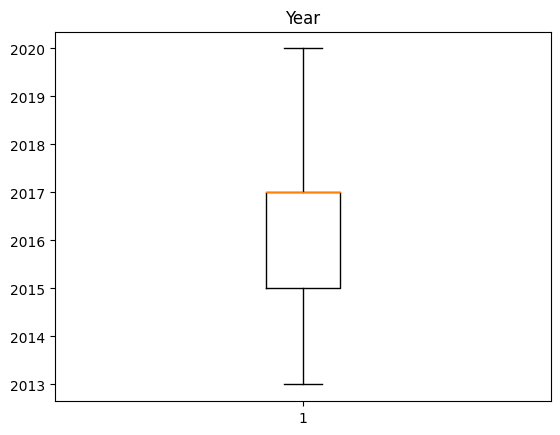

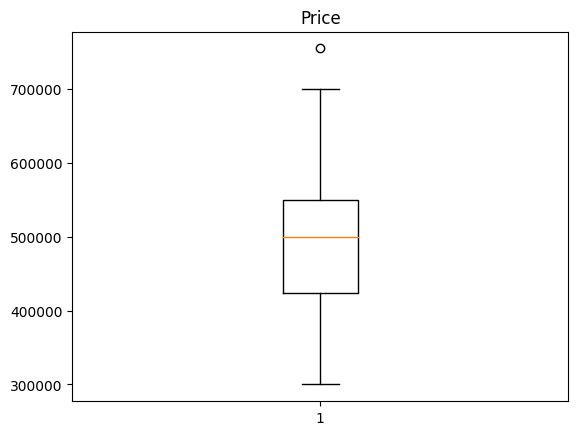

In [62]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i);

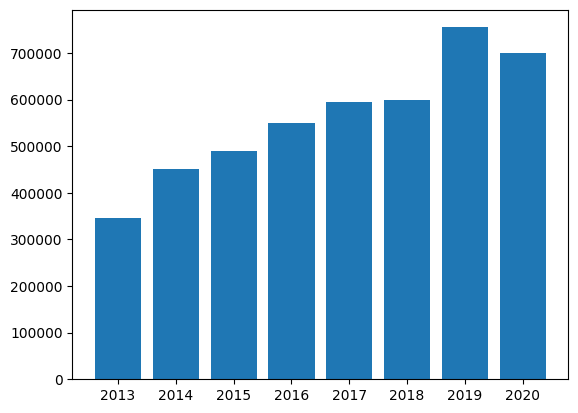

In [63]:
x= data['Year']
y= data['Price']
plt.bar(x,y)
plt.show()

outlier handling

In [64]:
Q1 = np.percentile(data['Price'],25,method='midpoint')
Q2 = np.percentile(data['Price'],50,method='midpoint')
Q3 = np.percentile(data['Price'],75,method='midpoint')

print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 422500.0
Q2 is: 500000.0
Q3 is: 550000.0


In [65]:
IQR =Q3-Q1
print(IQR)

127500.0


In [66]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('lower whisker:',low_lim)
print('upper whisker:',up_lim)

lower whisker: 231250.0
upper whisker: 741250.0


In [67]:
outlier =[]
for x in data['Price']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[755000]


In [68]:
data['Price'] = data['Price'].clip(lower=low_lim,upper=up_lim)

outlier =[]
for x in data['Price']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


In [69]:
data

,Year,Price
0,2018,465000
1,2019,741250
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Data preprocessing

### independent variable x =year


target variable y =price

no need of label encoding

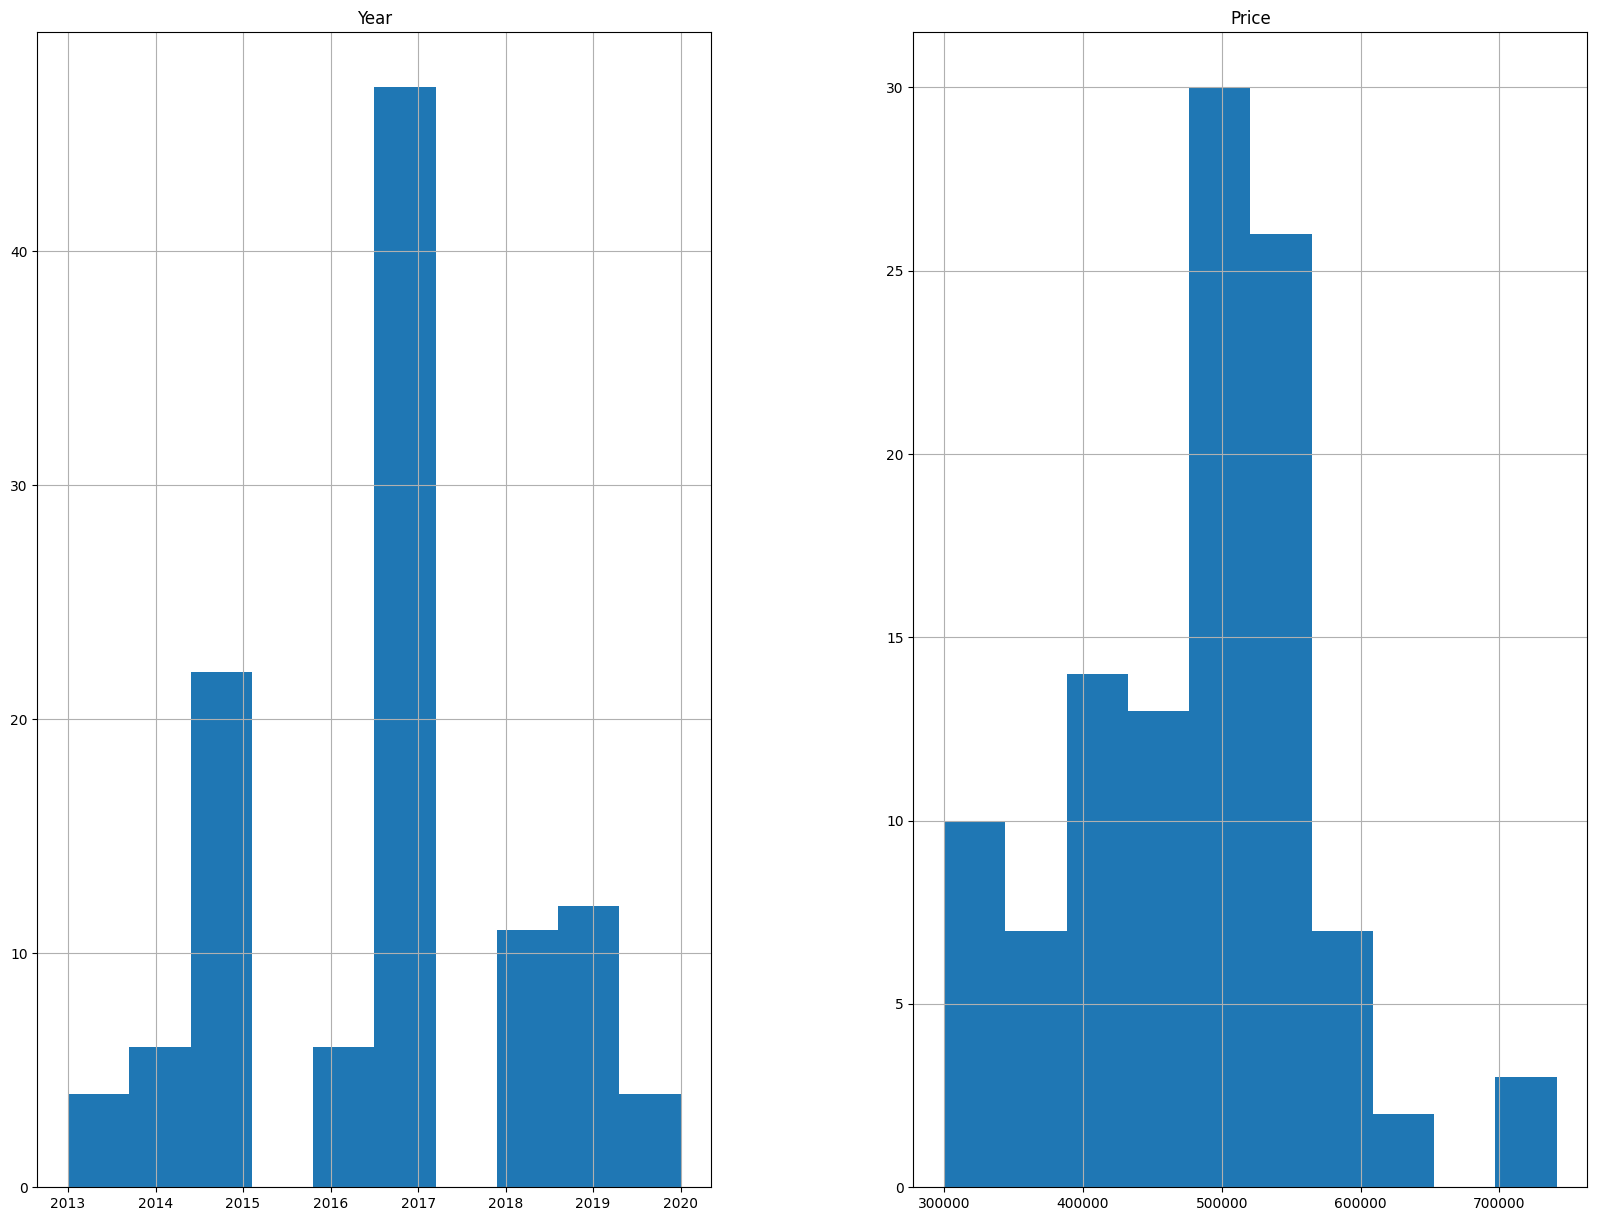

In [70]:
freqgraph=data.select_dtypes(include='int64')
freqgraph.hist(figsize=(20,15))
plt.show()

correlation analysis

In [71]:
correlation = data['Year'].corr(data['Price'])
print("Correlation coefficient between Year and Price:", correlation)

Correlation coefficient between Year and Price: 0.7774254643718028


 correlation coefficient is close to 1

 there is  a strong positive correlation
 As the year increases, the price may also increase.

# linear modeling

In [72]:
y=data['Price']
x=data['Year']


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [74]:

from sklearn import linear_model
lr=linear_model.LinearRegression()

Training the model

In [75]:
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()

In [76]:
x_train_reshaped = x_train_array.reshape(-1, 1)

In [77]:
model=lr.fit(x_train_reshaped,y_train)

testing the model

In [78]:
x_test_array = x_test.to_numpy()


In [79]:
x_test_reshaped = x_test_array.reshape(-1, 1)


In [80]:
predictions=model.predict(x_test_reshaped)
predictions

array([598677.74065064, 505035.55134371, 551856.64599717, 551856.64599717,
       551856.64599717, 411393.36203676, 505035.55134371, 551856.64599717,
       598677.74065064, 598677.74065064, 317751.17272983, 505035.55134371,
       411393.36203676, 645498.8353041 , 551856.64599717, 598677.74065064,
       317751.17272983, 411393.36203676, 505035.55134371, 505035.55134371,
       505035.55134371, 505035.55134371, 505035.55134371, 505035.55134371,
       505035.55134371, 505035.55134371, 411393.36203676, 411393.36203676])

# checking MSE to check how good is the model

In [81]:
from sklearn.metrics import mean_squared_error
print("MSE is: ",mean_squared_error(y_test,predictions))

MSE is:  3858824644.309628


In [82]:
from sklearn.metrics import r2_score
print('R2 score is :', r2_score(y_test,predictions))

R2 score is : 0.4377021333036414


In [83]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(alpha=0.1)
lasso_r.fit(x_train_reshaped, y_train_array)
lasso_predictions = lasso_r.predict(x_test_reshaped)
lasso_r2_score = r2_score(y_test, lasso_predictions)
print("R2 score for Lasso Regression:", lasso_r2_score)

R2 score for Lasso Regression: 0.43770258249973315


# Predicting the price for 2022 model



In [84]:

year_2022 = np.array([[2022]])
linear_pred_2022 = lr.predict(year_2022)
lasso_r.fit(x_train_reshaped, y_train_array)
lasso_pred_2022 = lasso_r.predict(year_2022)

In [85]:

print("Predicted price of a 2022 model (Lasso Regression):", lasso_pred_2022[0])

Predicted price of a 2022 model (Lasso Regression): 739140.8083734065


In [86]:
print("Predicted price of a 2022 model (Linear Regression):", linear_pred_2022[0])

Predicted price of a 2022 model (Linear Regression): 739141.024611026


In [87]:
x_test_reshaped = x_test.values.reshape(-1, 1)

In [88]:
lasso_pred = lasso_reg.predict(x_test_reshaped)

In [89]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Lasso Regression MSE:", lasso_rmse)

Lasso Regression MSE: 62119.41372596078


In [91]:
if MSE < lasso_rmse:
    print("Linear Regression is performing better")
else:
    print("Lasso Regression is performing better")

Lasso Regression is performing better


In [99]:
linear_r2_score=0.4377021333036414


In [100]:
if linear_r2_score >  lasso_r2_score:
    print("Linear Regression is performing better" )
else:
    print("Lasso Regression is performing better")

Lasso Regression is performing better


# lasso regression model is good for this analysis